In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error
from PIL import Image

In [11]:
img_path='/content/drive/My Drive/BTECH SEM 5/Image&VideoProcessing/LAB4/8bitimg.jpg'

In [12]:
img=cv2.imread(img_path)

In [13]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [14]:
img.shape

(256, 256)

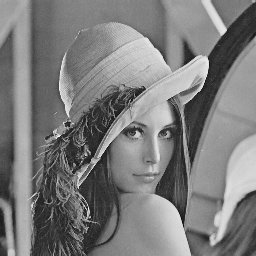

In [15]:
cv2_imshow(img)

In [16]:
def quantizer(g_img,level):
  g_img_flatten=g_img.reshape((1,-1))
  f_max=np.max(g_img_flatten)
  f_min=np.min(g_img_flatten)
  b=(f_max-f_min)/level
  res=[]
  for i in g_img_flatten:
    res.append(np.floor((i-f_min)/b)*b + b/2+ f_min)
  results=np.array(res).reshape((256,256))
  mse=mean_squared_error(g_img,results)
  return (results,mse)

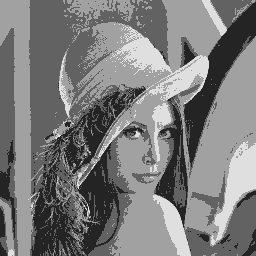

Mean squared Error for  4  Level is :  307.36312103271484 using custom function



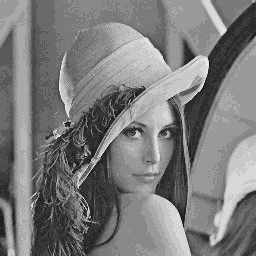

Mean squared Error for  16  Level is :  20.87488603591919 using custom function



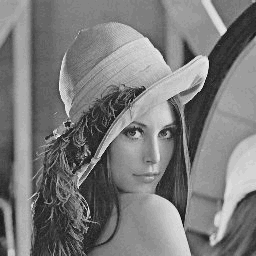

Mean squared Error for  32  Level is :  5.112407922744751 using custom function



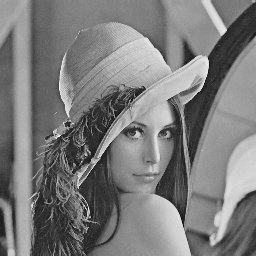

Mean squared Error for  64  Level is :  1.2792555689811707 using custom function



In [17]:
levels=[4,16,32,64]
for level in levels:
  res,mse=quantizer(img,level)
  cv2_imshow(res)
  print('Mean squared Error for ',level,' Level is : ',mse,'using custom function')
  print()
 


Displaying the result using im.quantize 


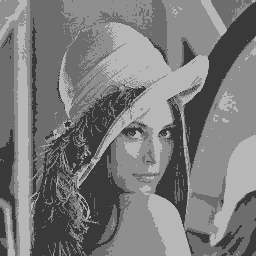


Displaying the result using im.quantize 


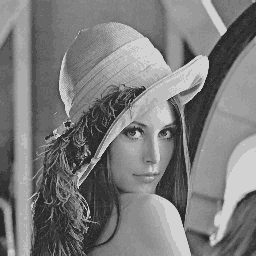


Displaying the result using im.quantize 


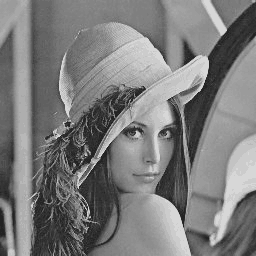


Displaying the result using im.quantize 


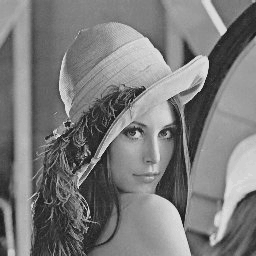

In [18]:
 for level in levels:
   im=Image.open(img_path)
   pil_img=im.quantize(colors=level)
   print('Displaying the result using im.quantize ')
   display(pil_img)
   print()

In [19]:
from scipy import ndimage

In [20]:
img=cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
r ,bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)


In [21]:
dst_euc = cv2.distanceTransform(bw_img,cv2.DIST_L1, 3)
print('Euclidean  TRANSFORM')
print(dst_euc)

Euclidean  TRANSFORM
[[30. 29. 28. ...  2.  2.  1.]
 [30. 29. 28. ...  2.  1.  0.]
 [30. 29. 28. ...  1.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [22]:
dst_cb = cv2.distanceTransform(bw_img,cv2.DIST_L2, 3)
print('City-Block TRANSFORM')
print(dst_cb)


City-Block TRANSFORM
[[28.650055   27.695053   26.740051   ...  1.9100037   1.3692932
   0.95500183]
 [28.650055   27.695053   26.740051   ...  1.3692932   0.95500183
   0.        ]
 [28.650055   27.695053   26.740051   ...  0.95500183  0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [23]:
dst_chess = cv2.distanceTransform(bw_img,cv2.DIST_C, 3)
print('CHESS TRANSFORM')
print(dst_chess)


CHESS TRANSFORM
[[28. 28. 28. ...  2.  1.  1.]
 [27. 27. 27. ...  1.  1.  0.]
 [26. 26. 26. ...  1.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


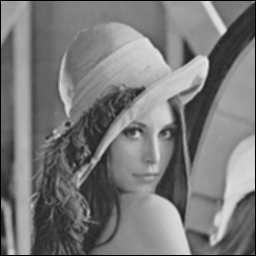

In [25]:

img = cv2.imread(img_path, 0)  
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
img_new = np.zeros([m, n])   
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2_imshow(img_new)

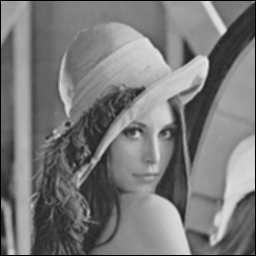

In [29]:
img = cv2.imread(img_path, 0)  
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([5,5], dtype = int) 
mask = mask / 9
img_new = np.zeros([m, n])   
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2_imshow(img_new)

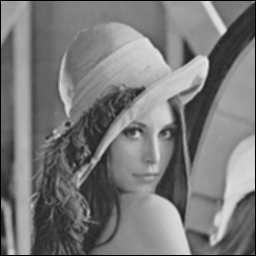

In [32]:
img = cv2.imread(img_path, 0)  
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([15,15], dtype = int) 
mask = mask / 9
img_new = np.zeros([m, n])   
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2_imshow(img_new)